# Деревья решений

Ранее мы рассмотрели два семейства алгоритмов: метрические (на примере kNN) и линейные (на примере линейной регрессии).  

У этих семейств алгоритмов есть свои достоинства и недостатки. В частности, основное ограничение линейных моделей заключалось в том, что они могут восстанавливать только линейные зависимости между признаками и целевой переменной. При этом мы могли делать полиномиальную регрессию, добавляя в выборку новые признаки на основе имеющихся, с которыми целевая переменная имеет нелинейную зависимость. Но этот подход требует экспериментального выбора типа  нелинейности (например, в задании 3.3 у разными студентами в качестве модели были предложены разные степени полинома: от 3 до 11).

Сегодняшняя тема: деревья решений. Это семейство моделей, которое позволяет восстанавливать нелинейные зависимости произвольной сложности. Важным достоинством деревьев решений является их наглядность и отличная интерпретируемость. Деревья решений хорошо описывают модель процесса принятия решений.

Классический пример такого процесса: принятие решения о выдачи кредита клиенту банка. Предположим, что про клиента известно следующее:
* Возраст заемщика в годах
* Доход в месяц
* Количество открытых кредитов и кредитных линий (кредитных карт)
* Количество ипотек и других кредитных продуктов, связанных с недвижимостью
* Количество иждивенцев в семье (супруг, дети и т.п.)

Мы можем построить несколько правил. В самом простом случае можно предложить последовательность правил, каждое из которых будет проверять значение признака, сравнивая его с неким порогом. 
1. "Возраст заемщика в годах" больше 80 - отказ, иначе идём дальше.
2. "Возраст заемщика в годах" меньше 18 - отказ, иначе идём дальше.
3. "Доход в месяц" меньше 20000 рублей - отказ, иначе идём дальше.
4. "Количество открытых кредитов и кредитных линий (кредитных карт)" больше 5 - отказ, иначе идём дальше.
и т.д.


Подобные алгоритмы очень хорошо описываются деревьями решений.

Нестареющая классика: часть дерева решений для пассажирова "Титаника".

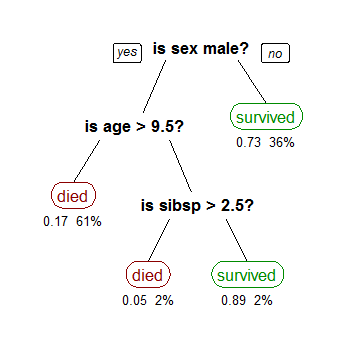

Недостатки деревьев решений:
* склонны к переобучению
* трудны для оптимизации (нельзя продифференцировать)
* методы построения жадные и эвристические

Достоинства:
* хорошо интерпретируются
* могут работать с пропущенными значениями 
* хорошо объединяются в композиции (об этом чуть позже)

## Определение дерева решений

* Это бинарное дерево.
* Каждой внутренней вершине приписана функция (предикат), которая возвращает TRUE или FALSE.
* Каждой листовой вершине приписан прогноз (например, в виде вероятности).

Могут быть многомерные признаки (линейные, метрические). Но с ними очень тяжело работать, на практике они редко применяются, поэтому мы будем использовать только одномерные предикаты:
$$ \beta_v (x;j,t)  = [x_j<t] $$
Здесь $v$ - это вершина, $x_j$ - значение $j$-го признака объекта $x$, $t$ - это порог 

## Построение дерева

Решающее дерево можно построить для любой выборки. При этом даже если мы будем использовать только одномерные предикаты, мы сможем построить дерево, которое на выборке не будет допускать ошибок.

Рассмотрим вот такой пример (Источник: https://habr.com/ru/post/171759/)

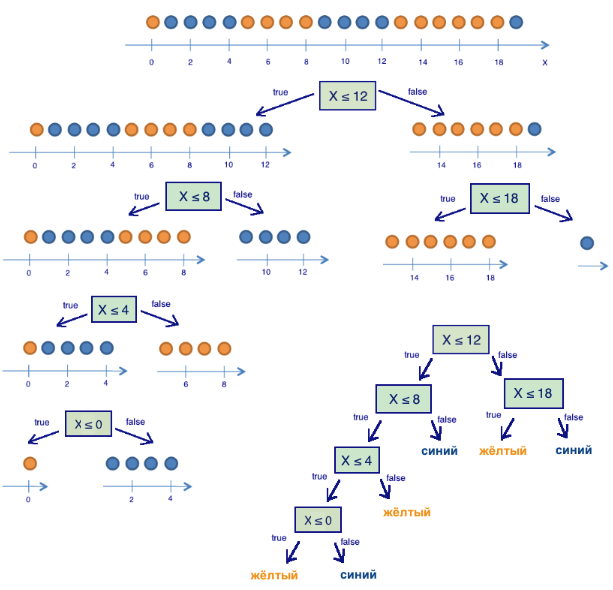

Дерево, которое не допускает ошибок на обучающей выборке, скорее всего, будет переобученным и на данных из контрольной будет ошибаться.

Опишем жадный алгоритм построения бинарного дерева решений:
1. Начинаем со всей обучающей выборки $X$.
2. Задаём функционал качества $Q(X, j, t)$ и критерий остановки. 
3. Находим наилучшее с точки зрения $Q$ разбиение $X$ на две части: $R_{left} = \lbrace x|x_j<t \rbrace$ и $R_{right} = \lbrace x|x_j \geqslant t \rbrace$
4. Создадим вершину (для первого шага корневую), поместив в неё предикат $[x_j<t]$
5. Поместим $R_{left}$ и $R_{right}$ соответсвенно в левое и правое поддерево.
6. Рекурсивно повторяем шаги 3-5 пока не выполнится критерий остановки.
7. Поставим в соответствие каждому листу ответ. Для задачи классификации - это самый частый среди объектов класс или вектор с долями классов (можно интерпретировать как вероятности). Для задачи регрессии - например, среднее значение целевой переменной по всем объектам в этом листе.  


При построении дерева, нужно понять, 1) какой признак $j$ выбрать на каждом шаге, 2) какой порог $t$ выбрать для создания предиката  $[x_j<t]$, 3) когда остановиться. 

Выбор признака и порога зависят от того, какой задан функционала качества $Q(X, j, t)$. Об этом в следующем разделе.

Критерии остановки:
* ограничение максимальной глубины дерева
* ограничение минимального числа объектов в листе
* ограничение максимального количества листьев в дереве
* purity (остановка, если все объекты в листе относятся к одному классу)




## Функционал качества для деревьев решений


Для интуитивного понимания алгоритма, представим, что я загадал знаменитого человека, а вы пытаетесь отгадать его за ограниченное число вопросов (ограничили глубину дерева). Разрешено задавать только такие вопросы, на которые ответом является "да/нет". Правильная стратегия отгадывающего знаменитость в этой игре такова: нужно каждым вопросом уменьшать количество осташихся вариантов. Рассмотрим три вопроса: 1) Это мужчина? 2) Живёт в Санкт-Петербурге? 3) Играет за "Зенит"? Очевидно, что лучше в этой игре начать с первого вопроса. 

Так интуитивно мы оцениваем разный прирост информации, основанный на энтропии.

Это не единственный функционал, но мы будем разбирать только его. Именно этот функционал применяется в алгоритме [ID3](https://ru.wikipedia.org/wiki/ID3_(%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC))

Энтропия Шеннона для системы с N возможными состояниями определяется по формуле:
$$H = - \sum_{i=0}^{N} p_i\log_2p_i $$

где $p_i$ – вероятности нахождения системы в $i$-ом состоянии. 

Это очень важное понятие теории информации, которое позволяет оценить количество информации (степень хаоса в системе). Чем выше энтропия, тем менее упорядочена система и наоборот. С помощью энтропии мы формализуем функционал качества для разделение выборки (для задачи классификации).

In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
 
import random
from pprint import pprint

Код для расчёта энтропии:

In [ ]:
def entropy(y):
    
    _, counts = np.unique(y, return_counts=True)
 
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

Здесь y - это массив значений целевой переменной

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
entropy(iris.target)

1.584962500721156

In [ ]:
entropy(iris.target[:100])

1.0

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [ ]:
entropy(y_test)

1.5775765559836064

In [ ]:
y_train.size

100

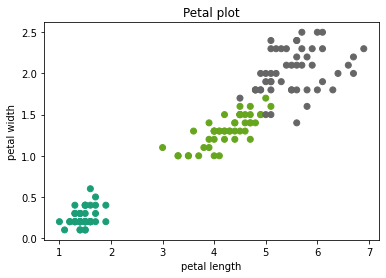

In [ ]:
plt.scatter(iris.data[:,2:3],iris.data[:,3:4],c=iris.target, cmap=plt.cm.Dark2)
plt.title('Petal plot')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

Кажется, что если petal length меньше 2.5, то мы имеет разбиение, в котором одно поддерево будет содержать объекты только одного класса.

In [ ]:
df= pd.DataFrame(data= np.c_[iris.data, iris.target],
                 columns= iris['feature_names'] + ['target'])
 
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df = df.drop(['target'], axis=1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
entropy(df['species'])

1.584962500721156

In [ ]:
sample1 = df[df['petal length (cm)']<2.5]

In [ ]:
entropy(sample1['species'])

0.0

In [ ]:
sample2 = df[df['petal length (cm)']>2.5]
entropy(sample2['species'])

1.0

Давайте попробуем другое разбиение.

In [ ]:
sample1 = df[df['petal length (cm)']<5]
sample2 = df[df['petal length (cm)']>=5]

In [ ]:
print(entropy(sample1['species']))
print(entropy(sample2['species']))

1.2602398669134125
0.2580186686648155


Как мы говорили ранее  энтропия – по сути степень хаоса (или неопределенности) в системе. Уменьшение энтропии называют приростом информации (information gain, IG).

В нашем случае, в исходных данных энтропия была равна примерно 1.58. В первом разбиении 1.0, а во втором примерно 1.52. Оба разбиения уменьшили энтропию. Но первое разбиение уменьшило её сильнее, значит второе разбиение хуже. 

Обочначим $R_v$ - объекты, которые нужно разделить в помощью предиката в вершине $v$. Запишем формулу для расчёта информационного прироста:
$$ Q = IG = H(R_v) - (H(R_{left})+H(R_{right}))$$

На каждом шаге нам нужно максимизировать этот функционал качества. Как это делать? Например, так можно перебрать $t$ для выбранного $j$.

In [ ]:
grid = np.linspace(df['petal length (cm)'].min(), df['petal length (cm)'].max(), 10)

best_t = grid[0]
best_IG = -1
for t in grid:
  sample1 = df[df['petal length (cm)'] < t]
  sample2 = df[df['petal length (cm)'] >= t]
  IG = entropy (df['species']) - (entropy(sample1['species']) + entropy(sample2['species']))
  # print (IG)
  if IG > best_IG:
    best_t, best_IG  = t, IG

print (best_t) 

2.311111111111111


## Задание 4.1

Реализуйте алгоритм построения дерева. Должны быть отдельные функции (методы) для расчёта энтропии (уже есть), для разделения дерева (используйте `pandas`), для подсчёта функционала качества, для выбора наилучшего разделения (с учетом признаком и порогов, для проверки критерия остановки.

Функционал качества $IG$.

Для набора данных iris реализуйте алгоритм и минимум три из разными критерия остановки из перечисленных ниже:
* максимальной глубины дерева = 5
* минимального числа объектов в листе = 5
* максимальное количество листьев в дереве = 5
* purity (остановка, если все объекты в листе относятся к одному классу)

Реализуйте функцию predict (на вход функции подаётся датафрейм с объектами)

Оцените точность каждой модели с помощью метрики точность (`from sklearn.metrics import accuracy_score` или реализовать свою).

In [ ]:
#Вычисляет IG
def IG(R_v, r_l, r_r):
  if (r_l.size == 0 or r_r.size == 0):
    return -1
  return entropy(R_v) - ( ((r_l.size / R_v.size) * entropy(r_l)) + ((r_r.size / R_v.size) * entropy(r_r)) )

#Критерий остановки
def checkStop(d, left, right):
  # print(left.size, right.size)
  return d >= 5 or left.size < 5 or np.all(left == left[0]), d >= 5 or right.size < 5 or np.all(right == right[0])

def bestDivision(feature_column, values, length):
  grid = np.linspace(feature_column.min(), feature_column.max(), length)

  best_t = grid[0]
  best_IG = -1
  for t in grid:
    values_l = values[feature_column < t] 
    values_r = values[feature_column >= t] 

    IG_i = IG(values, values_l, values_r)

    if IG_i > best_IG:
      best_t, best_IG  = t, IG_i

  return best_IG, best_t


In [ ]:
class Node:

  ## Свойства для любой не крайней ноды:

  #is_prediction_node - является ли нода крайней
  #trainig_points - действующий датасет, с которым ведется работа в этой ноде (для обучения)
  #training_values - значения для датасета
  #value_to_check - значение меньше или больше которого (проверка при предикте)
  #feature_index - индекс признака в датасете по которому проводить проверку
  #depth - глубина ноды
  #left - левая нода (меньше)
  #right - правая нода (больше)

  ## Свойства крайней ноды:

  #predicted_value (только на крайней ноде)
  #probability_of_predicted_value (только на крайней ноде)
  #is_prediction_node - является ли эта нода конечной

  def __init__(self, is_pred_node = False):
    self.is_prediction_node = is_pred_node

  def split_and_set(self):
    dataset = self.trainig_points
    dataset_values = self.training_values

    iterate_index = np.random.permutation(dataset.shape[1])
    best_feature = -1
    best_IG = -1
    best_division_value = -1

    for i in iterate_index:
      IG_i, division_value = bestDivision(dataset[:,i], dataset_values, 20)
      if (IG_i > best_IG):
        best_IG = IG_i
        best_feature = i
        best_division_value = division_value

    left_dataset = dataset[dataset[:,best_feature] < best_division_value]
    left_values = dataset_values[dataset[:,best_feature] < best_division_value]

    right_dataset = dataset[dataset[:,best_feature] >= best_division_value]
    right_values = dataset_values[dataset[:,best_feature] >= best_division_value]

    self.value_to_check = best_division_value
    self.feature_index = best_feature

    flag_left, flag_right = checkStop(self.depth, left_values, right_values)

    return left_dataset, left_values, right_dataset, right_values, flag_left, flag_right

  def fit(self, dataset, dataset_values, current_depth = -1):
    self.trainig_points = dataset
    self.training_values = dataset_values
    self.depth = current_depth + 1

    l_d, l_v, r_d, r_v, l_f, r_f = self.split_and_set()
    # print(self.depth)
    # print("l_v = ", l_v)
    # print("r_v = ", r_v)
    # print("l_f, r_f = ", l_f, r_f)

    if (l_f == False):
      self.left = Node()
      self.left.fit(l_d, l_v, self.depth)

    else:
      # print("finished at left node with prob. and val. = ", self.calculate_prediction_and_probability(l_v), ", at depth = ", self.depth)
      self.left = Node(is_pred_node = True)
      self.left.predicted_value, self.left.probability_of_predicted_value = self.calculate_prediction_and_probability(l_v)

    if (r_f == False):
      self.right = Node()
      self.right.fit(r_d, r_v, self.depth)

    else:
      # print("finished at right node with prob. and val. = ", self.calculate_prediction_and_probability(r_v), ", at depth = ", self.depth)
      self.right = Node(is_pred_node = True)
      self.right.predicted_value, self.right.probability_of_predicted_value = self.calculate_prediction_and_probability(r_v)



  def calculate_prediction_and_probability(self, values):
    v, c = np.unique(values, return_counts=True)
    # print(v, c)
    best_probability = 0
    best_value = -1

    for i in range(0, c.size):
      if (c[i] / values.size > best_probability):
        best_probability = c[i] / values.size
        best_value = v[i]

    # print(best_value, best_probability)
    return best_value, best_probability

  def predict(self, dataset):
    predictions = np.array([])
    
    for i in range(0, dataset.shape[0]):
      # print(dataset[i])
      if dataset[i][self.feature_index] < self.value_to_check:
        _, prediction = self.left.predict_r(dataset[i])
        # print(prediction)
        predictions = np.append(predictions, prediction)
      else:
        _, prediction = self.right.predict_r(dataset[i])
        # print(prediction)
        predictions = np.append(predictions, prediction)
    return predictions

  def predict_r(self, row):
    # print(self.is_prediction_node)
    if (self.is_prediction_node == True):
      return self.probability_of_predicted_value, self.predicted_value
    elif row[self.feature_index] < self.value_to_check:
      return self.left.predict_r(row)
    else:
      return self.right.predict_r(row)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
myModel = Node()
myModel.fit(X_train, y_train)

In [ ]:
arr_pred = myModel.predict(X_train)

In [ ]:
accuracy_score(y_train, arr_pred)

0.98

In [ ]:
arr_pred = myModel.predict(X_test)

In [ ]:
accuracy_score(y_test, arr_pred)

0.96

# Пример из sklearn

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42)

In [ ]:
simple_tree = DecisionTreeClassifier()

Посмотрим на гиперпараметры алгоритмы. Кроме уже известных нам (выбор критерия, по кооторому счиатется функционал качества, критериев остановки), там есть ещё несколько любопытных настроек. В частности, можно ограничивать признаки, которые будут участвовать в предикатах. Зачем это может понадобиться?

In [ ]:
DecisionTreeClassifier?

In [ ]:
simple_tree.fit(X_train, y_train)
simple_tree.score(X_test, y_test)

In [ ]:
simple_tree

In [ ]:
np.mean(cross_val_score(simple_tree, X_train, y_train, cv=5)) # будем использовать кросс-валидацию

Попробуем улучшить этот результат, за счёт настройки гиперпараметров.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree_params = {'max_depth': np.arange(1, 11), 'min_samples_leaf':np.arange(1, 20)}

In [ ]:
tree_grid = GridSearchCV(simple_tree, tree_params)

In [ ]:
%time
tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.score(X_test, y_test)

In [ ]:
tree_grid.best_estimator_

In [ ]:
tree_grid.best_params_

In [ ]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(simple_tree, filled=True)
plt.show()

Визуализация дерева решений: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

# Композиция деревьев

Давайте сначала рассмотрим общую идею. Вы уже узнали разные семейства алгоритмов, подходящих для решения задачи классификации. Также вы научились выбирать наилучший алгоритм из заданного семейства и оценивать качество этих алгоритмов. Предположим, вы уже нашли самый лучший модель и повысить его качество больше не можете. В таком случае нужно применить техники объединения разных (более слабых) алгоритмов в один (более сильный). Эта техника назвается «ансамбли» или  «композиции». 

Ансамбль — это некая совокупность, части которой образуют единое целое. 

Несложно доказать, что, например, в задаче бинарной классификации, если предсказание каждого алгоритма не зависит от других алгоритмов, и если вероятность правильного ответа больше случайного угадывания (то есть в нашем примере больше 0.5), то тогда вероятность правильного ответа композации таких алгоритмов в целом возрастает с увеличением их количества и стремится к единице.



"Мудрость толпы". 

В 1906 году Фрэнсис Гальтон (это тот же, который придумал термин "регрессия") посещал выставку достижений животноводства. На выставке проводился конкурс, в рамках которого всем желающим предлагалось на глаз угадать точный вес быка. Около 800 человек пытались, но ни один  не угадал точный вес быка. Бык весил 1198 фунтов. Гальтон посчитал среднее значение по всем ответам, и получил 1197 фунтов.

На основе деревьев решений можно собрать более сильный классификатор: случайный лес (*random forest*) - один из самых распространённых ансамблей алгоритмов.

Опишем алгоритм и попутно разберём основные идеи:

1. Зададим $N$ - число деревьев в лесу.
2. Для каждого $n$ из $N$ сгенерируем свою выборку $X_n$. Пусть $m$ - это количество объектов в $X$. При генерации каждой $X_n$ мы будем брать объекты $m$ раз с возвращением. То есть один и тот же объект может попасть в выборку несколько раз, а какие-то объекты не попадут. (Этот способ назвается бутстрап).
3. По каждой $X_n$ построим решающее дерево $b_n$. В качестве критериев остановки можно использовать `max_depth` или `min_samples_leaf`. В задачах классификации строить каждое дерево до тех пор, пока в каждом листе не окажется по одному объекту. При каждом разбиении сначала выбирается $k$ (эвристика $k = \sqrt d$, где $d$ - это число признаков объектов из выборки $X$) случайных признаков из исходных, и оптимальное разделение выборки ищется только среди них.
4. Итоговый алгоритм будет представлять собой результат голосования (для классификации) и среднее арифметическое (для регрессии). Модификация алгоритма предполагает учёт весов каждого отдельного слабого алгоритма в ансамбле.








## Задание 4.2

В качестве набора данных используйте: https://www.kaggle.com/mathchi/churn-for-bank-customers

Там есть описание и примеры работы с этими данными. Если кратко, речь идёт про задачу прогнозирования оттока клиентов. Есть данные о 10 тысячах клиентов банка, часть из которых больше не являются клиентами.

Используя либо свою реализацию, либо  `DecisionTreeClassifier` с разными настройками из `sklearn.tree` реализйте алгоритм "случайный лес". 

Найдите наилучшие гиперпараметры этого алгоритма: количество деревьев, критерий остановки, функционал качества, минимальное количество объектов в листьях и другие.

Нельзя использовать готовую реализацию случайного леса из `sklearn`.

В подобных задачах очень важна интерпретируемость алгоритма. Попытайтесь оценить информативность признаков, т.е. ответить а вопрос, значения каких признаков являются самыми важными индикаторами того, что банк потеряет клиента.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
 
import random

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.metrics import accuracy_score

In [ ]:
training_data = pd.read_csv('churn.csv')

In [ ]:
training_points = training_data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
training_values = training_data.Exited

In [ ]:
training_points.head()

#заметим, что географию и пол можно представить
#в виде целых чисел

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
training_points.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
le = preprocessing.LabelEncoder()
#страны
le.fit(training_points.Geography)
training_points.Geography = le.transform(training_points.Geography)

#пол
le.fit(training_points.Gender)
training_points.Gender = le.transform(training_points.Gender)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training_points, training_values, test_size=0.33, random_state=42)

In [ ]:
class RTree:
  #trees - массив с деревьями решений (tree_count штук)
  #columns - столбцы, которые были взяты для построения дерева i
  #predictions - предсказания моделей

  #recent_accuracy
  trees = list()
  columns = list()
  predictions = list()

  #mtry - кол-во переменных в подвыборке (sqrt)
  #sampsize - число наблюдений (2/3)
  def fit(self, points, values, tree_count, mtry, sampsize):
    for _ in range(0, tree_count):
      points_i = points.sample(sampsize).sample(mtry, axis=1)
      values_i = values[points_i.index]
      columns_i = points_i.columns.to_numpy()

      self.columns.append(columns_i)

      tree_i = DecisionTreeClassifier()
      tree_params_i = {'max_depth': np.arange(1, 10),'min_samples_leaf':np.arange(1,2)}
      tree_grid_i = GridSearchCV(tree_i, tree_params_i)
      tree_grid_i.fit(points_i, values_i)
      # self.trees = np.append(self.trees, tree_grid_i)
      self.trees.append(tree_grid_i)

      # print(points_i, values_i)

  def predict(self, points):
    self.predictions = list()
    for i in range(0, len(self.trees)):
      prediction_i = self.trees[i].predict(points[self.columns[i]])
      self.predictions.append(prediction_i)
    return self.vote()
    
  def vote(self):
    voted_predictions = list()
    p = np.array(self.predictions)
    for i in range(0, p.shape[1]):
      voted_predictions.append(np.bincount(p[:,i]).argmax())
    return np.array(voted_predictions)

  # мешаем столбец, считаем accuracy, ищем отклонение, возвращаем столбец в норму
  # и т.д до последнего столбца
  def value_of_features(self, points, values):
    mutated_points = points.copy()
    # print(mutated_points)
    feature_values = list()
    point_names = mutated_points.columns
    self.recent_accuracy = accuracy_score(values, self.predict(points))
    print(self.recent_accuracy)

    for i in range(0, points.shape[1]):
      # print(mutated_points)
      mutated_points[point_names[i]] = np.array(points.iloc[:,i].sample(frac=1))
      feature_values.append(accuracy_score(values, self.predict(mutated_points)) - self.recent_accuracy)
      # print(mutated_points)
      mutated_points[point_names[i]] = np.array(points.iloc[:,i])

    return feature_values

In [ ]:
myModel = RTree()
m_t = int(np.sqrt(X_train.shape[1]))
s_s = int(X_train.shape[0] * 2/3)
myModel.fit(X_train, y_train, 10, m_t, s_s)

In [ ]:
pred = myModel.predict(X_train)
accuracy_score(y_train, pred)

0.7943283582089552

In [ ]:
pred = myModel.predict(X_test)
accuracy_score(y_test, pred)

0.8096969696969697

In [ ]:
# чем выше отклонение - тем важнее признак
# например, высокое значение играет кол-во продуктов, место жительства, возраст.
# совсем не влияют пол, tenure и имеет ли пользователь кредитку
myModel.value_of_features(X_test, y_test)

0.8096969696969697


[-0.00030303030303024947,
 -0.0033333333333332993,
 0.0,
 -0.0033333333333332993,
 0.0,
 -0.0009090909090908594,
 -0.00424242424242427,
 0.0,
 -0.0015151515151514694,
 -0.00060606060606061]